In [156]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [157]:
users = pd.read_csv("01_users.csv")
trs = pd.read_csv("02_transactions.csv")
trs_detail = pd.read_csv("03_transaction_details.csv")

In [158]:
print('User data type is \n ',users.dtypes,'\n')
print('===========================')
print('Transaction data type is \n', trs.dtypes, '\n')
print('===========================')
print('Transaction detail data type is \n', trs_detail.dtypes, '\n')
print('===========================')

User data type is 
  user_id           object
unique_user_id    object
user_loc_state     int64
dtype: object 

Transaction data type is 
 transaction_id                  object
user_id                         object
status                          object
transaction_timestamp           object
delivery_timestamp              object
estimated_delivery_timestamp    object
dtype: object 

Transaction detail data type is 
 transaction_id        object
payment_mode          object
num_installments       int64
transaction_value    float64
dtype: object 



### Check for any NA

In [159]:
users.isna().any()

user_id           False
unique_user_id    False
user_loc_state    False
dtype: bool

In [160]:
trs.isna().any()

transaction_id                  False
user_id                         False
status                          False
transaction_timestamp           False
delivery_timestamp               True
estimated_delivery_timestamp    False
dtype: bool

In [161]:
trs_detail.isna().any()

transaction_id       False
payment_mode         False
num_installments     False
transaction_value    False
dtype: bool

In [162]:
# Find any duplicate users
duplicate_users = users[users.duplicated()]
duplicate_users.shape

(0, 3)

In [163]:
# Find any duplicate transactions
duplicate_trs = trs[trs.duplicated()]
duplicate_trs.shape

(0, 6)

In [164]:
# Find any duplicate transactions details
duplicate_trs_detail = trs_detail[trs_detail.duplicated()]
duplicate_trs_detail.shape

(614, 4)

In [165]:
# Dropping the duplicates
users = users.drop_duplicates()
trs = trs.drop_duplicates()
trs_detail = trs_detail.drop_duplicates()

In [166]:
# Merging transaction and transaction_details into one dataset
transactions = pd.merge(trs, trs_detail, on='transaction_id')
transactions.shape

(103272, 9)

In [167]:
# Merge the users and transactions to make a complete dataset
complete = pd.merge(users,transactions, on = "user_id")

## Q1
How scattered are the users statewise?

## Q2
How users buying behavior scattered based on months?

## Q3
How scattered are the users statewise?

## Q4
What are the users mostly used payment methods?

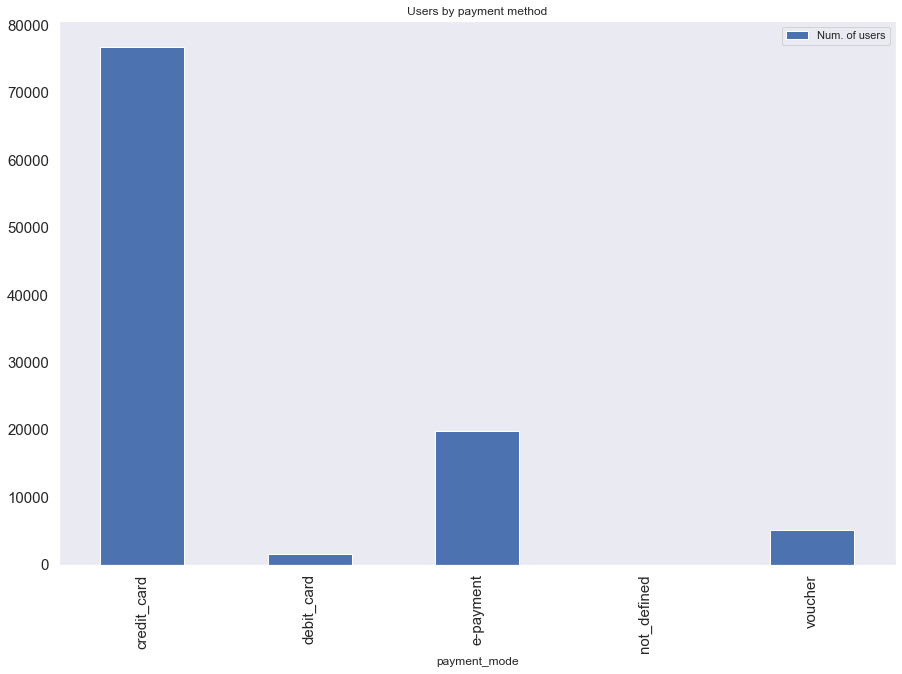

In [168]:
payment_method = complete[["user_id","payment_mode"]]
sectors = payment_method.groupby("payment_mode")
payment_method = pd.DataFrame(sectors["user_id"].count())
payment_method.rename(columns= {'user_id': 'Num. of users'}, inplace=True)
payment_method
ax = payment_method[['Num. of users']].plot.bar(title='Users by payment method', legend = True, table = False, grid = False,
                                                subplots = False, figsize = (15,10), fontsize=15)

## Q5
What is the rate of cancelled transactions?

In [169]:
records = complete.size
canceled = complete[complete.status=='canceled'].size
print('The percentage of canceled transactions are: ', round((canceled/records) * 100,3))

The percentage of canceled transactions are:  0.632


### Q6
Feature correlations

In [170]:
corr = complete.corr()
corr
#sns.heatmap(corr)

,user_loc_state,num_installments,transaction_value
user_loc_state,1.000000,-0.064185,-0.055871
num_installments,-0.064185,1.000000,0.329222
transaction_value,-0.055871,0.329222,1.000000


### Q7
Payment mode vs loc_state vs num installment

### Q8
Find total amount of transactions, then find they users who are making multiple transactions

Find their ratio of transactions over total transactions of users with multiple transactions and compare it with average of user transaction (number of users over total of transaction)

Calculate the number of users who are buying above or equal to average

## Predicting

In [171]:
# unique_user_trs = pd.merge(trs, users, on = "user_id")
# transaction_per_user = unique_user_trs.groupby('user_id').count()
# unique_users = pd.DataFrame(complete['user_id'].unique())
# users_trs = pd.merge(unique_users,transactions, on = "user_id")
# unique_users
# complete['next_purchase_day'] = (complete[''] - complete['']).dt.days

# complete['six_months'] = complete[pd.Timestamp.now < complete['transaction_timestamp'] < ]
# complete['three_months']
# complete['one_month']

In [172]:
complete['transaction_timestamp'] = pd.to_datetime(complete['transaction_timestamp'])
start_day = complete['transaction_timestamp'].min()
end_day = complete['transaction_timestamp'].max()

In [173]:
test = users.groupby("unique_user_id").nunique()
x=test.groupby("unique_user_id").agg(['sum'])
x

,user_id,user_loc_state
,sum,sum
unique_user_id,,
0003322h53dgi8e8hfeg38d5610f1354,1,1
000344h2h9f56195h333h30f6f47f7g7,1,1
000408770eg657ihh96iid5d6235deh4,1,1
00042d3e95h394ei95094e911edf3610,1,1
0004807g89271401hif2fgefgd5dii22,1,1
...,...,...
iiifi6d6ii18e1019eg5h3gef846d795,1,1
iiihd58fg7g4ff1d99eg732673d0g172,1,1


In [174]:
test=pd.DataFrame()
test['No purchase'] = users['unique_user_id'].value_counts()

In [175]:
test['user_id'] = users['unique_user_id'].value_counts().index.tolist()

In [176]:
# test = pd.merge(test,complete, left_on = 'user_id')
complete.shape

(103272, 11)

# A new Beginning

In [177]:
complete['transaction_timestamp'] = pd.to_datetime(complete['transaction_timestamp'])
start_day = complete['transaction_timestamp'].min()
end_day = complete['transaction_timestamp'].max()
last_sm = complete[(complete.transaction_timestamp >= end_day-pd.DateOffset(months=6))]
before_time = complete[(complete.transaction_timestamp < end_day-pd.DateOffset(months=6))]
tx_user = pd.DataFrame(before_time['unique_user_id'].unique())
tx_user.columns = ['unique_user_id']
tx_next_purchase = last_sm.groupby('unique_user_id').transaction_timestamp.min().reset_index()
tx_next_purchase.columns = ['unique_user_id','minPurchaseDate']
tx_last_purchase = before_time.groupby('unique_user_id').transaction_timestamp.max().reset_index()
tx_last_purchase.columns = ['unique_user_id','maxPurchaseDate']
tx_purchase_date = pd.merge(tx_last_purchase, tx_next_purchase, on = 'unique_user_id', how = 'left')
tx_purchase_date['nextPurchaseDate'] = (tx_purchase_date['minPurchaseDate'] - tx_purchase_date['maxPurchaseDate']).dt.days

In [178]:
tx_user = pd.merge(tx_user,tx_purchase_date[['unique_user_id', 'nextPurchaseDate']], on = 'unique_user_id', how = 'left')
# tx_user.isnull().sum(axis=1)
# 2/3 of the data has label na, I have data imbalance problem
tx_user = tx_user.fillna(999)

In [179]:

tx_user = pd.merge(tx_user,last_sm[['unique_user_id', 'user_loc_state']], on = 'unique_user_id', how = 'left')

In [180]:
# Build recency
# get max purchase date for Recency and create a dataframe
tx_max_purchase = last_sm.groupby('unique_user_id').transaction_timestamp.max().reset_index()
tx_max_purchase.columns = ['unique_user_id','maxPurchaseDate']

#find the recency in days and add it to tx_user
tx_max_purchase['Recency'] = (tx_max_purchase['maxPurchaseDate'].max() - tx_max_purchase['maxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['unique_user_id','Recency']], on='unique_user_id')

In [194]:
# import plotly for visualization
import chart_studio.plotly as py
from chart_studio import plotly
# import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go



# Plot recency
plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)



In [182]:
from sklearn.cluster import KMeans

#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#order recency clusters
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

#print cluster characteristics
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,227.0,164.955947,9.920382,147.0,157.00,165.0,173.0,182.0
1,172.0,128.226744,8.949552,113.0,121.00,128.0,135.0,146.0
2,110.0,95.990909,9.542272,82.0,87.25,94.0,104.0,112.0
3,146.0,67.006849,8.245790,49.0,60.00,68.0,74.0,81.0


In [183]:
# get total purchases for frequency scores
tx_frequency = last_sm.groupby('unique_user_id').transaction_timestamp.count().reset_index()
tx_frequency.columns = ['unique_user_id','Frequency']

# add frequency column to tx_user
tx_user = pd.merge(tx_user, tx_frequency, on='unique_user_id')

In [184]:
tx_user.head(5)

,unique_user_id,nextPurchaseDate,user_loc_state,Recency,RecencyCluster,Frequency
0,3g25667135i5eeh12i258687108f53ih,208.0,1.0,72,3,1
1,gf59e1d2e1h7dee7697i433f290i7e04,265.0,4.0,57,3,1
2,f8f20221153147h7377dgf009fei2390,251.0,5.0,74,3,1
3,ih4h63gh135e93817828f49f9h294195,321.0,10.0,78,3,2
4,ih4h63gh135e93817828f49f9h294195,321.0,10.0,78,3,2


In [121]:
#plot frequency
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

NameError: name 'go' is not defined

In [122]:
# Clustering for frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order frequency clusters and show the characteristics
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,538.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,86.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,19.0,3.210526,0.418854,3.0,3.0,3.0,3.0,4.0
3,12.0,6.166667,1.029857,5.0,5.0,7.0,7.0,7.0


In [123]:
last_sm.head(5)

,user_id,unique_user_id,user_loc_state,transaction_id,status,transaction_timestamp,delivery_timestamp,estimated_delivery_timestamp,payment_mode,num_installments,transaction_value
24,493e266f0d05804ggeg00g9i9e1998i9,gh76290g51342i33ef6156d9e0953i11,0,gge5e3226834306eeh45555eefe3f2g6,delivered,2018-08-10 23:54:00,8/29/2018 14:46,9/20/2018 0:00,credit_card,4,220.39
25,9ii94701d83gf6690ef40853809d239e,f7ef3ei5e86i4i0gd6fh06082d3i574e,0,e9g9i6h00080i8fei652455dh23f9fi5,delivered,2018-07-29 21:05:00,8/15/2018 17:07,9/20/2018 0:00,credit_card,8,591.88
31,7396i715id81d24086d105508gd4ei7e,e49843061216528e292247f11i0iii0g,0,h428i52291e9d7id4fh97e7ied7df4id,delivered,2018-06-25 20:52:00,7/5/2018 18:32,8/3/2018 0:00,e-payment,1,158.27
34,5662g4511i79igd47g1173838e37f15e,1956g921e593i5g570g4f99491i5d8g6,0,df5e8hfgddd79g6f48h737h0d2i50116,delivered,2018-05-03 22:54:00,5/24/2018 3:27,6/12/2018 0:00,credit_card,5,595.49
38,70h79i2g1d457e536i8d60h2884d9g21,391i2hg3g9fgh3e739673717d7gg9i55,0,g1d86g7hgd72e9d8372057e45iie461f,delivered,2018-04-20 14:44:00,5/18/2018 8:18,6/11/2018 0:00,credit_card,5,281.60


In [124]:
tx_user.shape

(655, 7)

In [125]:
#calculate monetary value, create a dataframe with it
last_sm['Revenue'] = last_sm['transaction_value']
tx_revenue = last_sm.groupby('unique_user_id').Revenue.sum().reset_index()

#add Revenue column to tx_user
tx_user = pd.merge(tx_user, tx_revenue, on='unique_user_id')

In [126]:
#plot Revenue
plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

NameError: name 'go' is not defined

In [127]:
#Revenue clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

#ordering clusters and who the characteristics
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,476.0,94.923361,43.299269,17.29,59.4225,92.450,132.610,184.10
1,144.0,275.306736,76.437500,186.10,205.1375,246.295,336.645,432.18
2,27.0,644.903704,123.134404,479.44,530.5600,630.120,708.625,961.49
3,8.0,1450.180000,132.673473,1237.28,1384.3200,1402.320,1596.960,1596.96


In [128]:
#building overall segmentation
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

#assign segment names
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 


In [129]:
tx_user.shape

(655, 11)

In [130]:
#plot revenue vs frequency
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

NameError: name 'go' is not defined

In [131]:
#plot revenue vs recency
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#plot frequency vs recency
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

NameError: name 'go' is not defined

First, I create a dataframe with unique_user_id and transaction_timestamp (not datetime).
Then I will remove the duplicates (I have done that already, but just to make sure) since customers can do multiple purchases in a day and difference will become 0 for those.

In [132]:
#create a dataframe with unique_user_id and transaction_timestamp
tx_day_order = last_sm[['unique_user_id','transaction_timestamp']]
#convert Invoice Datetime to day
tx_day_order['transaction_timestamp'] = last_sm['transaction_timestamp'].dt.date
tx_day_order = tx_day_order.sort_values(['unique_user_id','transaction_timestamp'])
# #drop duplicates
# tx_day_order = tx_day_order.drop_duplicates(subset=['unique_user_id','transaction_timestamp'],keep='first')

Next, by using shift, I create new columns with the dates of last 3 purchases and see how our dataframe looks like:

In [133]:
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('unique_user_id')['transaction_timestamp'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('unique_user_id')['transaction_timestamp'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('unique_user_id')['transaction_timestamp'].shift(3)

In [134]:
tx_day_order['T2InvoiceDate'].shape

(29855,)

Let’s begin calculating the difference in days for each invoice date:

In [135]:
tx_day_order['DayDiff'] = (tx_day_order['transaction_timestamp'] - tx_day_order['PrevInvoiceDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['transaction_timestamp'] - tx_day_order['T2InvoiceDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['transaction_timestamp'] - tx_day_order['T3InvoiceDate']).dt.days

In [136]:
tx_day_order.head(10)

,unique_user_id,transaction_timestamp,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
101225,0003322h53dgi8e8hfeg38d5610f1354,2018-04-21,NaN,NaN,NaN,NaN,NaN,NaN
88844,0004807g89271401hif2fgefgd5dii22,2018-04-24,NaN,NaN,NaN,NaN,NaN,NaN
90077,0005f31970g625e1d03777g3792h5hf2,2018-06-28,NaN,NaN,NaN,NaN,NaN,NaN
19434,000858eed2g2i449d327g61944i34863,2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
30590,000e8d9i449h9e9g7i05i976d921222g,2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN
62615,000f3gd907f1d8h427364gg9e987353e,2018-08-16,NaN,NaN,NaN,NaN,NaN,NaN
71203,000h81778h782e347h71ife03h67ifi7,2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN
61821,000i64d6hd181h293d64555e24edh2f1,2018-06-17,NaN,NaN,NaN,NaN,NaN,NaN
89693,000i84f94517gef30i5f941ige98e37e,2018-08-07,NaN,NaN,NaN,NaN,NaN,NaN
3037,000id1e969i533iieif9d6512gg1dfe5,2018-06-10,NaN,NaN,NaN,NaN,NaN,NaN


For each customer ID, I utilize .agg() method to find out the mean and standard deviation of the difference between purchases in days:

In [137]:
tx_user.shape

(655, 11)

In [138]:
tx_day_diff = tx_day_order.groupby('unique_user_id').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['unique_user_id', 'DayDiffMean','DayDiffStd']

Now I'm going to make a tough decision. The calculation above is quite useful for customers who have many purchases. 
But I can’t say the same for the ones with 1–2 purchases. For instance, it is too early to tag a customer as frequent who has only 2 purchases but back to back.
I only keep customers who have > 3 purchases by using the following line:

In [139]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['unique_user_id'],keep='last')

Finally, I drop NA values, merge new dataframes with tx_user and apply .get_dummies() for converting categorical values:

In [140]:
tx_day_order_last.head(5)

,unique_user_id,transaction_timestamp,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
101225,0003322h53dgi8e8hfeg38d5610f1354,2018-04-21,NaN,NaN,NaN,NaN,NaN,NaN
88844,0004807g89271401hif2fgefgd5dii22,2018-04-24,NaN,NaN,NaN,NaN,NaN,NaN
90077,0005f31970g625e1d03777g3792h5hf2,2018-06-28,NaN,NaN,NaN,NaN,NaN,NaN
19434,000858eed2g2i449d327g61944i34863,2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
30590,000e8d9i449h9e9g7i05i976d921222g,2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# tx_day_order_last = tx_day_order_last.dropna()
# tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='unique_user_id')
# tx_user = pd.merge(tx_user, tx_day_order_last[['unique_user_id','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='unique_user_id')
#create tx_class as a copy of tx_user before applying get_dummies
tx_class = tx_user.copy()
# tx_class = pd.get_dummies(tx_class)

In [142]:
tx_day_order_last.head(5)

,unique_user_id,transaction_timestamp,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
101225,0003322h53dgi8e8hfeg38d5610f1354,2018-04-21,NaN,NaN,NaN,NaN,NaN,NaN
88844,0004807g89271401hif2fgefgd5dii22,2018-04-24,NaN,NaN,NaN,NaN,NaN,NaN
90077,0005f31970g625e1d03777g3792h5hf2,2018-06-28,NaN,NaN,NaN,NaN,NaN,NaN
19434,000858eed2g2i449d327g61944i34863,2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
30590,000e8d9i449h9e9g7i05i976d921222g,2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='unique_user_id')
# tx_user = pd.merge(tx_user, tx_day_order_last[['unique_user_id','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='unique_user_id')
#create tx_class as a copy of tx_user before applying get_dummies
tx_class = tx_user.copy()
# tx_class = pd.get_dummies(tx_class)

My feature set is ready for building a classification model. 
But there are many different models.
Let's talk about model selection.

In [144]:
tx_user.head(5)

,unique_user_id,nextPurchaseDate,user_loc_state,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,3g25667135i5eeh12i258687108f53ih,208.0,1.0,72,3,1,0,152.95,0,3,Mid-Value
1,gf59e1d2e1h7dee7697i433f290i7e04,265.0,4.0,57,3,1,0,133.62,0,3,Mid-Value
2,f8f20221153147h7377dgf009fei2390,251.0,5.0,74,3,1,0,143.04,0,3,Mid-Value
3,4836f6e9f2fi6hh70269i77033d973f5,174.0,6.0,59,3,1,0,134.28,0,3,Mid-Value
4,2df5122ehf3f1g0fh9hfhe67ee2253f8,190.0,6.0,58,3,1,0,149.11,0,3,Mid-Value


In [145]:
tx_class.head(5)

,unique_user_id,nextPurchaseDate,user_loc_state,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,3g25667135i5eeh12i258687108f53ih,208.0,1.0,72,3,1,0,152.95,0,3,Mid-Value
1,gf59e1d2e1h7dee7697i433f290i7e04,265.0,4.0,57,3,1,0,133.62,0,3,Mid-Value
2,f8f20221153147h7377dgf009fei2390,251.0,5.0,74,3,1,0,143.04,0,3,Mid-Value
3,4836f6e9f2fi6hh70269i77033d973f5,174.0,6.0,59,3,1,0,134.28,0,3,Mid-Value
4,2df5122ehf3f1g0fh9hfhe67ee2253f8,190.0,6.0,58,3,1,0,149.11,0,3,Mid-Value


This feature doesn't work. Therefore, I'm going to use Recency, Revenue, and Frequency features for my classification model.
Deciding the boundaries is a question for both statistics and business needs. It should make sense in terms of the first one and be easy to take action and communicate. 
Considering these two, I will have three classes:
0–20: Customers that will purchase in 0–20 days — Class name: 2
21–49: Customers that will purchase in 21–49 days — Class name: 1
≥ 50: Customers that will purchase in more than 50 days — Class name: 0

In [146]:
tx_class.head(5)

,unique_user_id,nextPurchaseDate,user_loc_state,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,3g25667135i5eeh12i258687108f53ih,208.0,1.0,72,3,1,0,152.95,0,3,Mid-Value
1,gf59e1d2e1h7dee7697i433f290i7e04,265.0,4.0,57,3,1,0,133.62,0,3,Mid-Value
2,f8f20221153147h7377dgf009fei2390,251.0,5.0,74,3,1,0,143.04,0,3,Mid-Value
3,4836f6e9f2fi6hh70269i77033d973f5,174.0,6.0,59,3,1,0,134.28,0,3,Mid-Value
4,2df5122ehf3f1g0fh9hfhe67ee2253f8,190.0,6.0,58,3,1,0,149.11,0,3,Mid-Value


In [147]:
tx_class['nextPurchaseDayRange'] = 2
tx_class.loc[tx_class.nextPurchaseDate<180,'nextPurchaseDayRange'] = 1
tx_class.loc[tx_class.nextPurchaseDate>180,'nextPurchaseDayRange'] = 0

<AxesSubplot:>

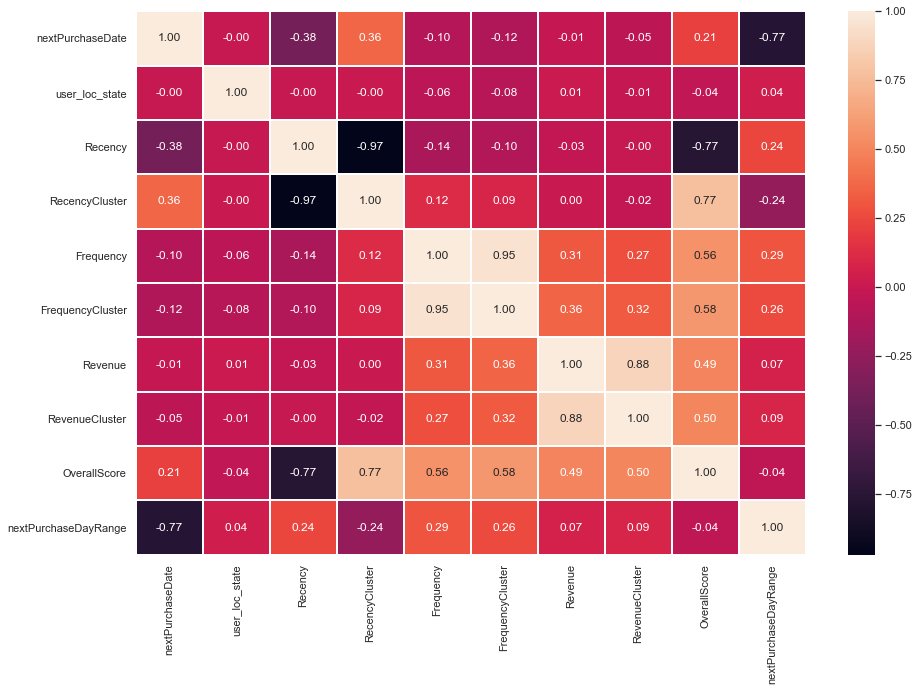

In [148]:
corr = tx_class[tx_class.columns].corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [149]:
tx_class.head(5)

,unique_user_id,nextPurchaseDate,user_loc_state,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,nextPurchaseDayRange
0,3g25667135i5eeh12i258687108f53ih,208.0,1.0,72,3,1,0,152.95,0,3,Mid-Value,0
1,gf59e1d2e1h7dee7697i433f290i7e04,265.0,4.0,57,3,1,0,133.62,0,3,Mid-Value,0
2,f8f20221153147h7377dgf009fei2390,251.0,5.0,74,3,1,0,143.04,0,3,Mid-Value,0
3,4836f6e9f2fi6hh70269i77033d973f5,174.0,6.0,59,3,1,0,134.28,0,3,Mid-Value,1
4,2df5122ehf3f1g0fh9hfhe67ee2253f8,190.0,6.0,58,3,1,0,149.11,0,3,Mid-Value,0


In [150]:
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#train & test split
# tx_class=tx_class.drop('Segment',axis=1)
tx_class = tx_class.drop('nextPurchaseDate',axis=1)
X, y = tx_class.drop('nextPurchaseDayRange',axis=1), tx_class.nextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [151]:
X_train.head(5)

X_train.dtypes

unique_user_id       object
user_loc_state      float64
Recency               int64
RecencyCluster        int64
Frequency             int64
FrequencyCluster      int64
Revenue             float64
RevenueCluster        int64
OverallScore          int64
Segment              object
dtype: object

In [152]:
train_identity=X_train["unique_user_id"]
X_train=X_train.drop(columns=['unique_user_id'])

test_identity=X_test["unique_user_id"]
X_test=X_test.drop(columns=['unique_user_id'])


In [153]:
X = X.drop(columns=['unique_user_id'])

In [154]:
import warnings
warnings.filterwarnings('ignore')

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=4, random_state=22, shuffle=True)
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    print(name, cv_result.mean())

LR nan
NB nan
RF nan
SVC nan
Dtree nan
XGB nan
KNN nan


In [155]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Segment

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(), 
param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=2)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth = , min_child_weight = ).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

In [ ]:
gsearch2 = GridSearchCV(estimator = SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=2)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch1.best_score_